## Statistical Learning and Deep Learning, 2020 Fall
### Homework 2

### Q1
First, read the training data and the testing data.

In [2]:
import numpy as np
import pandas as pd
import pickle
from sklearn import preprocessing

# read data
train = pd.read_csv('adult.data', header=None)
test = pd.read_csv('adult.test', header=None)

# assign column names
col_name = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 
           'marital-status', 'occupation', 'relationship', 'race', 'gender', 
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
train.columns = col_name
test.columns = col_name

# reorder columns
col_sequence = ['capital-loss', 'hours-per-week', 'capital-gain', 'educational-num', 'age', 'fnlwgt', 
              'relationship', 'race', 'gender', 'occupation', 'education', 'native-country', 'workclass', 
               'marital-status', 'income']
train = train[col_sequence]
test = test[col_sequence]
print(train.columns)
print(test.columns)

Index(['capital-loss', 'hours-per-week', 'capital-gain', 'educational-num',
       'age', 'fnlwgt', 'relationship', 'race', 'gender', 'occupation',
       'education', 'native-country', 'workclass', 'marital-status', 'income'],
      dtype='object')
Index(['capital-loss', 'hours-per-week', 'capital-gain', 'educational-num',
       'age', 'fnlwgt', 'relationship', 'race', 'gender', 'occupation',
       'education', 'native-country', 'workclass', 'marital-status', 'income'],
      dtype='object')


Then, remove NaNs.

In [3]:
train = train.replace(' ?', np.NaN).dropna()
test = test.replace(' ?', np.NaN).dropna()
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
print('train shape', train.shape)
print('test shape', test.shape)

train shape (30162, 15)
test shape (15060, 15)


Split $x$, $y$. Convert '>50K' and '<=50K' into 1 and 0.

In [4]:
x_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1:]
x_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1:]

convert_train = {' >50K': 1, ' <=50K': 0}
convert_test = {' >50K.': 1, ' <=50K.': 0}
y_train['income'] = y_train['income'].map(convert_train)
y_test['income'] = y_test['income'].map(convert_test)
print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_test: {y_test.shape}')

x_train: (30162, 14)
y_train: (30162, 1)
x_test: (15060, 14)
y_test: (15060, 1)


For all categorical features, apply 1-of-K encoding.

In [5]:
x_train_cat = x_train.select_dtypes(include='object')
x_train_num = x_train.select_dtypes(include='int64')
x_test_cat = x_test.select_dtypes(include='object')
x_test_num = x_test.select_dtypes(include='int64')

x_train_cat = pd.get_dummies(x_train_cat)
x_train_cat.columns = x_train_cat.columns.str.replace(' ', '')
x_test_cat = pd.get_dummies(x_test_cat)
x_test_cat.columns = x_test_cat.columns.str.replace(' ', '')
print('x_train_cat shape: ', x_train_cat.shape)
print('x_train_num shape: ', x_train_num.shape)
print('x_test_cat shape: ', x_test_cat.shape)
print('x_test_num shape: ', x_test_num.shape)

x_train_cat shape:  (30162, 98)
x_train_num shape:  (30162, 6)
x_test_cat shape:  (15060, 97)
x_test_num shape:  (15060, 6)


Remove features that appeared less than 10 times.

In [6]:
x_train_cat = x_train_cat[x_train_cat.columns[x_train_cat.sum() >= 10]]
x_test_cat = x_test_cat[x_train_cat.columns]
print('x_train_cat shape: ', x_train_cat.shape)
print('x_test_cat shape: ', x_test_cat.shape)

x_train_cat shape:  (30162, 96)
x_test_cat shape:  (15060, 96)


Normalize numerical features.

In [7]:
x_train_val = x_train_num.to_numpy()
x_scaler = preprocessing.StandardScaler().fit(x_train_val)
x_train_val = x_scaler.transform(x_train_val)
x_train_num = pd.DataFrame(data=x_train_val, columns=x_train_num.columns)

x_test_val = x_scaler.transform(x_test_num.to_numpy())
x_test_num = pd.DataFrame(data=x_test_val, columns=x_test_num.columns)

Combine data into dictionary.

In [8]:
adult50 = {}
adult50['num_col'] = x_train_num.columns.to_list()
x_train = pd.concat([x_train_num, x_train_cat], axis=1)
x_test = pd.concat([x_test_num, x_test_cat], axis=1)
adult50['x_train'] = x_train.to_numpy()
adult50['x_test'] = x_test.to_numpy()
adult50['y_train'] = np.reshape(y_train.to_numpy(), (1, -1))
adult50['y_test'] = np.reshape(y_test.to_numpy(), (1, -1))
adult50['columnname'] = x_train.columns.tolist()
adult50['num_col'] = x_train_num.columns.to_list()

Compare our result with `adult_m50k.pickle`.

In [9]:
import pickle
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

print('test dictionary keys: ', adult50kp.keys() == adult50.keys())
print('test columnname: ', adult50kp['columnname'] == adult50['columnname'])
print('test num_col: ', adult50kp['num_col'] == adult50['num_col'])

elems = ['x_train', 'x_test', 'y_train', 'y_test']
for aelem in elems:
    cnomatch = np.sum(adult50kp[aelem] != adult50[aelem])
    if cnomatch == 0:
        print(aelem, "match!")
    else:
        print(aelem, "%d elements no match!" % cnomatch)

test dictionary keys:  True
test columnname:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
test num_col:  True
x_train match!
x_test match!
y_train match!
y_test match!


### Q2

In [10]:
import pickle
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load dataset
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)
    
# train prediction model
c = 0.3
lr2 = LogisticRegression(solver = 'lbfgs', C= c, max_iter = 1000)
lr2.fit(adult50kp['x_train'], adult50kp['y_train'])

# make prediction
ypred = lr2.predict(adult50kp['x_test'])
ypredprob = lr2.predict_proba(adult50kp['x_test'])

# compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred)
accuracy_sk = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy_sk)    

Accuracy = 0.848406


#### Q2.1
Plot ROC curve.

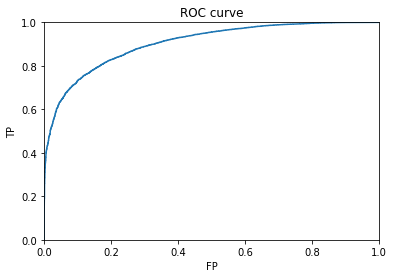

In [11]:
# define TP and FP
def TP(pred, actual):
    # TP = TP / P
    assert(pred.shape == actual.shape)
    n_data = pred.shape[0]
    p = n_data - np.sum(actual)
    tp = np.sum(np.logical_and(actual == [0]*n_data, pred == [0]*n_data))
    return (tp / p)
    
def FP(pred, actual):
    # FP = FP / N
    assert(pred.shape == actual.shape)
    n_data = pred.shape[0]
    n = np.sum(actual)
    fp = np.sum(np.logical_and(actual == [1]*n_data, pred == [0]*n_data))
    return(fp / n)


# compute TP and FP under different threshold
pos_prob = ypredprob[:, 0]
all_prob = np.sort(np.append(pos_prob, [0, 1]))

fp_rate = []
tp_rate = []
for thres in all_prob:
    above_thres = list(map(lambda p: 0 if p > thres else 1, pos_prob))
    above_thres = np.array(above_thres)
    fpr = FP(above_thres, adult50kp['y_test'])
    tpr = TP(above_thres, adult50kp['y_test'])
    fp_rate.append(fpr)
    tp_rate.append(tpr)

# plot
plt.title('ROC curve')
plt.xlabel('FP')
plt.ylabel('TP')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.plot(fp_rate, tp_rate)

#### Q2.2
Compute AUC

In [17]:
assert(len(fp_rate) == len(tp_rate))
n_observ = len(fp_rate)
fp_rate.reverse()
tp_rate.reverse()
auc = 0
for i in range(1, n_observ):
    auc += (tp_rate[i-1]+tp_rate[i]) * (fp_rate[i]-fp_rate[i-1]) / 2
print(f'AUC = {auc}')

AUC = 0.9034916373239368


### Q3

#### Q3.1
$E(w) = \frac{1}{2} w^T \Lambda w - \sum_{i=1}^n [ t_i \ln y_i  + (1 - t_i) \ln (1 - y_i)]$, where $y_i = \frac{1}{1 + exp({-w^T x_i})}$. 

$\begin{align}
\nabla E(w)
&= \frac{\partial E(w)}{\partial w} \\
&= {1 \over 2} \cdot \frac{\partial w^T \Lambda w}{\partial w} - \sum_{i=1}^n \frac{\partial t_i \ln y_i}{\partial w} - \sum_{i=1}^n \frac{\partial (1-t_i) \ln (1-y_i)}{\partial w}
\end{align}$

Let $z_1 = \frac{\partial w^T \Lambda w}{\partial w}$, $z_2 = \sum_{i=1}^n \frac{\partial t_i \ln y_i}{\partial w}$, $z_3 = \sum_{i=1}^n \frac{\partial (1-t_i) \ln (1-y_i)}{\partial w}$.

$\nabla E(w)$ can then be decomposed into ${1\over2}z_1 - z_2 - z_3$.

We compute the three components in the following.

$\begin{align}
z_1
&= \frac{\partial w^T \Lambda w}{\partial w} \\
&= 2\Lambda w
\end{align}$

$\begin{align}
z_2
&= \sum_{i=1}^n t_i \cdot \frac{\partial \ln y_i}{\partial w} \\
&= \sum_{i=1}^n \frac{t_i \partial \ln \sigma(w^Tx_i)}{\partial w} \\
&= \sum_{i=1}^n \frac{t_i}{\sigma(w^Tx_i)} \cdot \frac{\partial \sigma(w^Tx_i)}{\partial w} \\
&= \sum_{i=1}^n \frac{t_i}{\sigma(w^Tx_i)} \cdot \sigma(w^Tx_i)(1 - \sigma(w^Tx_i)) \cdot \frac{\partial w^T x_i}{\partial w} \\
&= \sum_{i=1}^n \frac{t_i \sigma(w^Tx_i)(1 - \sigma(w^Tx_i)) x_i}{\sigma(w^Tx_i)} \\
&= \sum_{i=1}^n t_i[1 - \sigma(w^Tx_i)] x_i \\
\end{align}$

$\begin{align}
z_3
&= \sum_{i=1}^n \frac{\partial (1-t_i) \ln (1-y_i)}{\partial w} \\
&= \sum_{i=1}^n (1-t_i) \cdot \frac{\partial \ln [1-\sigma(w^Tx_i)]}{\partial w} \\
&= \sum_{i=1}^n \frac{1-t_i}{1-\sigma(w^Tx_i)} \cdot \frac{\partial (1 - \sigma(w^Tx_i))}{\partial w} \\
&= \sum_{i=1}^n \frac{t_i - 1}{1-\sigma(w^Tx_i)} \cdot \frac{\partial \sigma(w^Tx_i)}{\partial w} \\
&= \sum_{i=1}^n \frac{t_i - 1}{1-\sigma(w^Tx_i)} \cdot \sigma(w^Tx_i)(1 - \sigma(w^Tx_i)) \cdot \frac{\partial w^T x_i}{\partial w} \\
&= \sum_{i=1}^n \frac{t_i - 1}{1-\sigma(w^Tx_i)} \cdot \sigma(w^Tx_i)(1 - \sigma(w^Tx_i)) \cdot x_i \\
&= \sum_{i=1}^n (t_i - 1) \cdot \sigma(w^Tx_i) x_i \\
\end{align}$

$\begin{align}
\nabla E(w)
&= {1\over2}z_1 - z_2 - z_3 \\
&= \frac{1}{2} \cdot 2\Lambda w - \sum_{i=1}^n t_i[1 - \sigma(w^Tx_i)] x_i - \sum_{i=1}^n (t_i - 1) \cdot \sigma(w^Tx_i) x_i \\
&= \Lambda w - \sum_{i=1}^n (t_i - \sigma(w^Tx_i)) x_i \\
&= \Lambda w - \sum_{i=1}^n (t_i - y_i) x_i \\
&= \Lambda w - X^T(t - y) \\
\end{align}$

where the i-th element in $y$, $y_i = \sigma(w^Tx_i) = \frac{1}{1 + exp({-w^T x_i})}$

#### Hessian matrix

$\begin{align}
H &= \nabla \nabla E(w) \\
&= \frac{\partial (\Lambda w - \sum_{i=1}^n (t_i - y_i) x_i)}{\partial w} \\
&= \Lambda - \sum_{i=1}^n \frac{\partial ((t_i - \sigma(w^T x_i))x_i)}{\partial w} \\
&= \Lambda + \sum_{i=1}^n \frac{\partial (\sigma(w^T x_i)x_i)}{\partial w} \\
&= \Lambda + \sum_{i=1}^n \sigma(w^T x_i)(1-\sigma(w^T x_i)) \cdot \frac{\partial w^T x_i}{\partial w} \cdot x_i  \\
&= \Lambda + \sum_{i=1}^n \sigma(w^T x_i)(1-\sigma(w^T x_i)) \cdot x_i^2  \\
&= \Lambda + \sum_{i=1}^n y_i(1-y_i) \cdot x_i^2  \\
&= \Lambda + X^T R X
\end{align}$

where $R$ is a $D \times D$ diagonal matrix with elements $R_{i, i} = y_i(1-y_i)$

### Q3.2
#### Implement `mylogistic_l2`

In [158]:
import numpy as np
import pickle
from scipy.special import expit

class mylogistic_l2():
    
    def __init__(self, reg_vec, max_iter=100, tol=1e-5, add_intercept=True):
        """
        reg_vec: the regularization coefficient vector
        max_iter: maximum number of iteration to run for the Newton method
        tol: tolerance for the objective function
        add_intercept: whether to add intercept (a column of ones) at last column of the feature matrix
        """
        self.reg_vec = reg_vec
        self.lam_mat = np.diagflat(self.reg_vec)
        self.max_iter = max_iter
        self.tol = tol
        self.add_intercept = True

    def fit(self, x, t, verbal=False):
        n_data = t.shape[0]
        n_feature = x.shape[1]
        
        # add intercept if required
        if self.add_intercept:
            x = np.insert(x, n_feature, 1, axis=1)
            n_feature += 1
        
        # init w with ridge regression
        b = np.mean(self.reg_vec)
        inv_term = (x.T @ x) + b * np.eye(n_feature)
        self.w = np.linalg.inv(inv_term) @ x.T @ t
        
        # update w with the Newton-Raphson method
        prev_loss = np.Inf
        for i in range(self.max_iter):
            grad = self.__gradient(x, t, self.w)
            hessian = self.__hessian(x, t, self.w)
            self.w = self.w - np.linalg.inv(hessian) @ grad
            loss = self.__loss(x, t, self.w)
            
            # print message
            if verbal:
                print(f'iteration {i}: {loss}')
            
            # check tolerance
            if prev_loss - loss < self.tol:
                break
            
            prev_loss = loss
            
        return prev_loss
            

    def predict(self, x):
        if self.add_intercept:
            x = np.insert(x, x.shape[1], 1, axis=1)
        y = expit(x @ self.w)
        return np.where(y > 0.5, 1, 0)

    def __gradient(self, x, t, w):
        y = expit(x @ w)
        return self.lam_mat @ w - x.T @ (t - y)

    def __hessian(self, x, t, w):
        y = expit(x @ w)
        r_diag = np.array([y_i * (1 - y_i) for y_i in y])
        r = np.diagflat(r_diag)
        return self.lam_mat + x.T @ r @ x
    
    def __loss(self, x, t, w):
        y = expit(x @ w)
        ln_y = np.log(y)
        ln_1_y = np.log(1 - y)
        return (w.T @ self.lam_mat @ w / 2) - (t.T @ ln_y) - ((1-t).T @ ln_1_y)  

#### Test

First, read the dataset.

In [159]:
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)
    
x_train = adult50kp['x_train']
y_train = adult50kp['y_train']
x_test = adult50kp['x_test']
y_test = adult50kp['y_test']

#### Case 1: lambda = 1 for all coefficients

In [110]:

lambda_vec = np.ones(x_train.shape[1] + 1)
logic1 = mylogistic_l2(reg_vec=lambda_vec, max_iter=1000, tol=1e-5, add_intercept=True)
logic1.fit(x_train, y_train, verbal=True)

iteration 0: 11774.187058373574
iteration 1: 10290.20488679521
iteration 2: 9847.447046164438
iteration 3: 9778.796798615136
iteration 4: 9775.277416363426
iteration 5: 9775.247127751614
iteration 6: 9775.247122461304


In [113]:
# results
def acc(act, pred):
    n_correct = np.sum(act == pred)
    n_data = act.shape[0]
    return (n_correct / n_data)

y_pred = logic1.predict(x_test)
print(f'w = {logic1.w}')
print(f'accuracy = {acc(y_test, y_pred)}')

w = [ 2.58310749e-01  3.52951378e-01  2.33390152e+00  7.51145211e-01
  3.33524430e-01  7.92368680e-02 -2.59305992e-01 -3.31059192e-02
 -8.02092312e-01 -1.16328375e+00 -1.57480268e-01  1.06974336e+00
 -6.33846058e-01  1.16732409e-01 -2.31567381e-01 -5.17122207e-01
 -7.97216465e-02 -1.09949780e+00 -2.46027086e-01  6.19694928e-02
  1.26685884e-01  8.62656059e-01 -9.18352843e-01 -6.21226177e-01
 -2.00740224e-01 -7.51600981e-01 -1.61011588e+00  5.75820911e-01
  6.48995283e-01  3.53741434e-01  7.17218474e-01 -2.84494743e-02
 -9.54820746e-04 -1.96540899e-01 -1.46351640e-01  6.26946275e-01
  4.48207080e-01  2.45945819e-02  4.69223657e-02 -4.91067746e-01
 -2.03035424e-01 -1.63303680e-01 -1.76623501e-02 -1.11328323e-01
 -9.94618240e-02 -1.17391916e+00  1.80702678e-01 -6.92720004e-02
  9.76496905e-01  4.60988601e-01 -4.95440416e-01 -1.27203531e+00
  4.86772406e-01 -8.98963733e-01 -6.00542591e-02 -3.50848853e-01
  4.32815220e-01  5.94120150e-01  5.82151924e-01 -6.20962283e-01
 -5.97480378e-02  9.2

#### Case 2: lambda = 1 for all but the intercept, no regularization for intercept term

In [115]:
# fit
lambda_vec = np.ones(x_train.shape[1] + 1)
lambda_vec[-1] = 0
logic1 = mylogistic_l2(reg_vec=lambda_vec, max_iter=1000, tol=1e-5, add_intercept=True)
logic1.fit(x_train, y_train, verbal=True)

iteration 0: 11773.646625265605
iteration 1: 10288.997557988638
iteration 2: 9845.652602749884
iteration 3: 9776.708278538063
iteration 4: 9773.142479313192
iteration 5: 9773.111189226107
iteration 6: 9773.111183558525


In [116]:
# result
y_pred = logic1.predict(x_test)
print(f'w = {logic1.w}')
print(f'accuracy = {acc(y_test, y_pred)}')

w = [ 0.25833063  0.35307341  2.33348255  0.7378757   0.33385106  0.07926886
 -0.04219572  0.1998764  -0.58360968 -0.93671312  0.07548468  1.28715744
 -0.37140327  0.39422898  0.04305748 -0.26147348  0.19559029 -0.42695771
  0.42695771  0.16424528  0.22840772  0.96472553 -0.81743779 -0.52074423
 -0.09910239 -0.64944042 -1.55235098  0.6786798   0.75066429  0.45541098
  0.81857112  0.07308911  0.0728464  -0.11752644 -0.06282948  0.67242506
  0.5040869   0.08799091  0.11435013 -0.38483984 -0.10196309 -0.05145374
  0.10741777 -0.01997934  0.01717544 -1.16567808  0.30082277  0.02715464
  1.00831207  0.50210397 -0.45756662 -1.24002555  0.52780939 -0.86832688
 -0.02771494 -0.31412701  0.47343435  0.62981111  0.62405658 -0.5867506
 -0.0296708   0.12414401 -0.14376238  0.02434194  0.0621604  -0.24843986
  0.19459429  0.52620501  0.93165615  0.18707696  0.37950109 -0.28749402
 -0.31137357 -0.33290534 -0.65117786 -0.38160106  0.48879121  0.17662205
  0.17410342 -0.07343502 -0.0314651  -0.89846776

#### Case 3: lambda = 1 for numerical-valued features, lambda = 0.5 for binary-valued features, no regularization for intercept term

In [135]:
# compute lambda
cols = adult50kp['columnname']
num_col = adult50kp['num_col']
is_num = np.isin(cols, num_col)
lambda_vec = np.array(list(map(lambda b: 1 if b else 0.5, is_num)))
lambda_vec = np.append(lambda_vec, 0)

# fit
logic1 = mylogistic_l2(reg_vec=lambda_vec, max_iter=1000, tol=1e-5, add_intercept=True)
logic1.fit(x_train, y_train, verbal=True)

iteration 0: 11771.483285222645
iteration 1: 10284.737094728252
iteration 2: 9839.022516791465
iteration 3: 9768.214608646455
iteration 4: 9764.261556174839
iteration 5: 9764.222600733669
iteration 6: 9764.222592337468


In [136]:
# result
y_pred = logic1.predict(x_test)
print(f'w = {logic1.w}')
print(f'accuracy = {acc(y_test, y_pred)}')

w = [ 0.25851661  0.3533387   2.33562764  0.7825921   0.33439916  0.07940036
 -0.08347988  0.23309134 -0.59278098 -0.9224849   0.11139573  1.25425869
 -0.38299462  0.41291781  0.04136013 -0.26411462  0.19283128 -0.42890321
  0.42890321  0.23635122  0.30021361  1.03810521 -0.75216086 -0.4534137
 -0.02691157 -0.5825269  -2.00075382  0.75127891  0.82696617  0.52830705
  0.89488994  0.14510375  0.18253094 -0.02583999  0.00991404  0.89862004
  0.68517002  0.23294385  0.24519931 -0.38363083 -0.08029608 -0.06493444
  0.0453608   0.03743376 -0.01295908 -2.09374319  0.25763304  0.06659781
  1.18748312  0.55059265 -0.47576613 -1.45842154  0.5822242  -1.0627833
 -0.00957211 -0.31704572  0.52485137  0.73044517  0.67457228 -0.63624179
 -0.00967268  0.17339113 -0.2364757   0.0375474   0.10120874 -0.24679341
  0.23800627  0.64228457  1.00567032  0.23258941  0.42267607 -0.35336167
 -0.29178766 -0.38125401 -0.96291964 -0.45007954  0.512985    0.22019382
  0.22640627 -0.04989103 -0.01836864 -0.95953334 

#### Q3.3

Split the training data into subtraining (90%) and tuning (10%).

In [160]:
train = np.concatenate((x_train, np.reshape(y_train, (-1, 1))), axis=1)
np.random.shuffle(train)
n_subtrain = int(train.shape[0] * 0.9)
subtrain = train[:n_subtrain, :]
tune = train[n_subtrain:, :]

x_subtrain = subtrain[:, :-1]
y_subtrain = subtrain[:, -1]
x_tune = tune[:, :-1]
y_tune = tune[:, -1]
print(f'x_subtrain shape: {x_subtrain.shape}')
print(f'y_subtrain shape: {y_subtrain.shape}')
print(f'x_tune shape: {x_tune.shape}')
print(f'y_tune shape: {y_tune.shape}')

x_subtrain shape: (27145, 102)
y_subtrain shape: (27145,)
x_tune shape: (3017, 102)
y_tune shape: (3017,)


(1) Choose a set of grids among a reasonable range. For example, 10 grids in [0.01, 100].

In [161]:
grid = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50, 100]

(2) Conduct grid search with the constraint that $a_1 = a_2$. Record the best value $a_1^*$ and $a_2^*$.

In [162]:
a1_op, a2_op = None, None
best_acc = 0
for lam in grid:
    lambda_vec = np.ones(x_subtrain.shape[1]) * lam
    lambda_vec = np.append(lambda_vec, 0)
    logic1 = mylogistic_l2(reg_vec=lambda_vec, max_iter=1000, tol=1e-5, add_intercept=True)
    logic1.fit(x_subtrain, y_subtrain)
    pred = logic1.predict(x_tune)
    accuracy = acc(y_tune, pred)
    print(f'lambda = {lam}, accuracy = {accuracy}')
    if accuracy > best_acc:
        a1_op = lam
        a2_op = lam
        best_acc = accuracy

lambda = 0.01, accuracy = 0.8468677494199536
lambda = 0.05, accuracy = 0.8471992045077892
lambda = 0.1, accuracy = 0.8468677494199536
lambda = 0.5, accuracy = 0.8475306595956248
lambda = 1, accuracy = 0.8478621146834604
lambda = 5, accuracy = 0.8468677494199536
lambda = 10, accuracy = 0.8455419290686113
lambda = 20, accuracy = 0.8445475638051044
lambda = 50, accuracy = 0.84487901889294
lambda = 100, accuracy = 0.8418959231024197


In [166]:
assert(a1_op == a2_op)
print(f'best lambda: {a1_op}')

best lambda: 1


$a_1^* = a_2^* = 1$

(3) Fix $a_1 = a_1^*$ and search $a_2$ for the best value. Call the result the new $a_2^*$.

In [169]:
a2_op = None
best_acc = 0
for a2 in grid:
    cols = adult50kp['columnname']
    num_col = adult50kp['num_col']
    is_num = np.isin(cols, num_col)
    lambda_vec = np.array(list(map(lambda b: a1_op if b else a2, is_num)))
    lambda_vec = np.append(lambda_vec, 0)
    
    logic1 = mylogistic_l2(reg_vec=lambda_vec, max_iter=1000, tol=1e-5, add_intercept=True)
    logic1.fit(x_subtrain, y_subtrain)
    pred = logic1.predict(x_tune)
    accuracy = acc(y_tune, pred)
    print(f'a2 = {a2}, accuracy = {accuracy}')
    if accuracy > best_acc:
        a2_op = a2
        best_acc = accuracy
print(f'best a2: {a2_op}')

a2 = 0.01, accuracy = 0.8468677494199536
a2 = 0.05, accuracy = 0.8471992045077892
a2 = 0.1, accuracy = 0.8468677494199536
a2 = 0.5, accuracy = 0.8475306595956248
a2 = 1, accuracy = 0.8478621146834604
a2 = 5, accuracy = 0.8468677494199536
a2 = 10, accuracy = 0.8478621146834604
a2 = 20, accuracy = 0.8462048392442824
a2 = 50, accuracy = 0.8435531985415976
a2 = 100, accuracy = 0.8435531985415976
best a2: 1


$a_2^* = 1$

(4) Fix $a_2 = a_2^*$ and search $a_1$ for the best value.

In [175]:
a1_op = None
best_acc = 0
for a1 in grid:
    cols = adult50kp['columnname']
    num_col = adult50kp['num_col']
    is_num = np.isin(cols, num_col)
    lambda_vec = np.array(list(map(lambda b: a1 if b else a2_op, is_num)))
    lambda_vec = np.append(lambda_vec, 0)
    
    logic1 = mylogistic_l2(reg_vec=lambda_vec, max_iter=1000, tol=1e-5, add_intercept=True)
    logic1.fit(x_subtrain, y_subtrain)
    pred = logic1.predict(x_tune)
    accuracy = acc(y_tune, pred)
    print(f'a1 = {a1}, accuracy = {accuracy}')
    if accuracy > best_acc:
        a1_op = a1
        best_acc = accuracy
print(f'best a1: {a1_op}')

a1 = 0.01, accuracy = 0.8478621146834604
a1 = 0.05, accuracy = 0.8478621146834604
a1 = 0.1, accuracy = 0.8478621146834604
a1 = 0.5, accuracy = 0.8478621146834604
a1 = 1, accuracy = 0.8478621146834604
a1 = 5, accuracy = 0.8475306595956248
a1 = 10, accuracy = 0.8468677494199536
a1 = 20, accuracy = 0.846536294332118
a1 = 50, accuracy = 0.8468677494199536
a1 = 100, accuracy = 0.8468677494199536
best a1: 0.01


$a_1^* = 0.01$
selected lambda: $(a_1^*, a_2^*) = (0.01, 1)$

(4) Train a model using the selected hyper-parameters.

In [178]:
# compute lambda
a1_op, a2_op = 0.01, 1
cols = adult50kp['columnname']
num_col = adult50kp['num_col']
is_num = np.isin(cols, num_col)
lambda_vec = np.array(list(map(lambda b: a1_op if b else a2_op, is_num)))
lambda_vec = np.append(lambda_vec, 0)

# fit
logic1 = mylogistic_l2(reg_vec=lambda_vec, max_iter=1000, tol=1e-5, add_intercept=True)
logic1.fit(x_train, y_train, verbal=True)

# predict
pred = logic1.predict(x_test)
accuracy = acc(y_test, pred)
print(f'accuracy = {accuracy}')

iteration 0: 11773.440290239803
iteration 1: 10287.941779628818
iteration 2: 9843.220191724415
iteration 3: 9773.621838672123
iteration 4: 9770.00190839761
iteration 5: 9769.970170068025
iteration 6: 9769.970164264001
accuracy = 0.847808764940239


#### Q3.4

Tune hyperparameters.

In [197]:
from sklearn.linear_model import LogisticRegression

# tune hyperparameter
grid = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50, 100]
best_acc = 0
best_c = None
for c in grid:
    clf = LogisticRegression(C=c, fit_intercept=True, max_iter=1000)
    clf.fit(x_subtrain, y_subtrain)
    pred = clf.predict(x_tune)
    accuracy = acc(y_tune, pred)
    if accuracy > best_acc:
        best_acc = accuracy
        best_c = c
print(f'best_c = {best_c}')

best_c = 1


Train a model with the selected hyperparameter and test on the testing data.

In [198]:
clf = LogisticRegression(C=best_c, fit_intercept=True, max_iter=1000)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
accuracy = acc(y_test, pred)
print(f'accuracy = {accuracy}')

accuracy = 0.8476095617529881


In [199]:
print(f'w = {clf.coef_}')
print(f'intercept = {clf.intercept_}')

w = [[ 0.25831095  0.35305992  2.33341248  0.73808509  0.3338047   0.07928801
  -0.04665658  0.19446582 -0.58873074 -0.94231022  0.07023909  1.28296743
  -0.37711869  0.38795162  0.03709107 -0.26750489  0.18955569 -0.44205094
   0.41202574  0.16328127  0.22747833  0.96383541 -0.81876501 -0.52195352
  -0.10006898 -0.65087773 -1.55536049  0.67785779  0.74971894  0.45446912
   0.8176959   0.07251055  0.07117713 -0.11939837 -0.06421714  0.67143352
   0.50205441  0.08666334  0.11242212 -0.38739541 -0.1041518  -0.05391201
   0.10474467 -0.02205727  0.01450121 -1.16503835  0.29825238  0.02489636
   1.00782193  0.49945656 -0.45755789 -1.24310256  0.52613361 -0.87244122
  -0.02884535 -0.31538858  0.47218078  0.62879435  0.62375866 -0.58766648
  -0.03065251  0.1240874  -0.14427751  0.02322553  0.0614599  -0.24962885
   0.19526249  0.52704901  0.92767816  0.18822848  0.37622549 -0.2896816
  -0.31147279 -0.3353401  -0.64187818 -0.38415652  0.48853677  0.17633515
   0.1738158  -0.07402117 -0.032778

We can see that the accuracy of the *LogisticRegression* model from sklearn are quite close to those obtained from *mylogistic_l2*, with difference around 0.01% only.

The weights are similar to those we get in Q3.2 case 1 and case 2. As for Q3.2 case 3, since lambda for binary features decreased, absolute values of the coefficients of binary features appeared to be slightly larger than those in case 2. The coefficients of the *LogisticRegression* model is similar to those in case 2.